In [ ]:
# prompt: mount the google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# prompt: display the content of Trash Net from dive

!ls "/content/drive/My Drive/Trash Net"


cardboard  glass  metal  paper	plastic  trash


In [ ]:
# prompt: reduce the oversampling and augmented images from Trash Net dataset

import os
import random

# Define the path to your Trash Net dataset
dataset_path = "/content/drive/My Drive/Trash Net"

# Define the percentage of images to keep
keep_percentage = 0.2  # Keep 20% of the images

# Iterate through each subfolder (class) in the dataset
for class_name in os.listdir(dataset_path):
  class_path = os.path.join(dataset_path, class_name)
  if os.path.isdir(class_path):
    # Get a list of all image files in the subfolder
    image_files = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

    # Calculate the number of images to keep
    num_images_to_keep = int(len(image_files) * keep_percentage)

    # Randomly select images to keep
    images_to_keep = random.sample(image_files, num_images_to_keep)

    # Delete the remaining images
    for image_file in image_files:
      if image_file not in images_to_keep:
        image_path = os.path.join(class_path, image_file)
        os.remove(image_path)
        print(f"Removed: {image_path}")


Streaming output truncated to the last 5000 lines.
Removed: /content/drive/My Drive/Trash Net/metal/oversampled_1911.jpg
Removed: /content/drive/My Drive/Trash Net/metal/oversampled_1912.jpg
Removed: /content/drive/My Drive/Trash Net/metal/oversampled_1913.jpg
Removed: /content/drive/My Drive/Trash Net/metal/oversampled_1914.jpg
Removed: /content/drive/My Drive/Trash Net/metal/oversampled_1917.jpg
Removed: /content/drive/My Drive/Trash Net/metal/oversampled_1918.jpg
Removed: /content/drive/My Drive/Trash Net/metal/oversampled_1919.jpg
Removed: /content/drive/My Drive/Trash Net/metal/oversampled_1920.jpg
Removed: /content/drive/My Drive/Trash Net/metal/oversampled_1922.jpg
Removed: /content/drive/My Drive/Trash Net/metal/oversampled_1923.jpg
Removed: /content/drive/My Drive/Trash Net/metal/oversampled_1924.jpg
Removed: /content/drive/My Drive/Trash Net/metal/oversampled_1925.jpg
Removed: /content/drive/My Drive/Trash Net/metal/oversampled_1927.jpg
Removed: /content/drive/My Drive/Trash 

In [ ]:
# prompt: remove the oversampling images from Trash Net dataset

import os
import shutil

# Define the path to the Trash Net dataset
dataset_path = "/content/drive/My Drive/Trash Net"

# Get a list of all files in the dataset
files = os.listdir(dataset_path)

# Iterate over the files
for file in files:
  # Check if the file is an image
  if file.endswith(".jpg") or file.endswith(".png"):
    # Check if the file name contains "oversampled"
    if "oversampled" in file:
      # Construct the full path to the file
      file_path = os.path.join(dataset_path, file)
      # Remove the file
      os.remove(file_path)
      print(f"Removed file: {file}")


In [ ]:
# prompt: perform Annotated images are scaled to 299 × 299 × 3 to fit the input layer of InceptionV3. on Trash Net dataset

import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the image size
img_width, img_height = 299, 299

# Create an ImageDataGenerator object
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Load the Trash Net dataset
train_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/Trash Net',
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)


Found 7844 images belonging to 7 classes.


In [ ]:
# prompt: plot images from the above dataset Trash Net

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Define the path to the temporary directory
temp_dir = "/content/preprocessed_data"

# Define the number of images to plot
num_images = 5

# Loop through each class
for class_name in classes:
  # Get the path to the class directory
  class_dir = os.path.join(temp_dir, class_name)

  # Get a list of image files in the class directory
  image_files = os.listdir(class_dir)

  # Select a random sample of images
  selected_images = random.sample(image_files, num_images)

  # Plot the images
  fig, axes = plt.subplots(1, num_images, figsize=(20, 5))
  for i, image_name in enumerate(selected_images):
    image_path = os.path.join(class_dir, image_name)
    img = mpimg.imread(image_path)
    axes[i].imshow(img)
    axes[i].set_title(class_name)
    axes[i].axis('off')
  plt.show()


Output hidden; open in https://colab.research.google.com to view.

Data Augmentation


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os

# Define the image data generator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True)

# Define the list of classes - this is what was missing!
classes = ["cardboard", "glass", "metal", "paper", "plastic", "trash"]

# Correct the path to your oversampled directory
oversampled_dir = "/content/drive/My Drive/Trash Net" # Update with the actual path

# Generate augmented data
for class_name in classes:
  class_dir = os.path.join(oversampled_dir, class_name)
  # Check if the directory exists before trying to list its contents
  if os.path.exists(class_dir):
    for image_name in os.listdir(class_dir):
      image_path = os.path.join(class_dir, image_name)
      image = load_img(image_path)
      x = img_to_array(image)
      x = x.reshape((1,) + x.shape)
      datagen.fit(x)
      for i, augmented_image in enumerate(datagen.flow(x, batch_size=1, save_to_dir=class_dir, save_prefix=f"{image_name.split('.')[0]}_augmented", save_format="jpg")):
        break
  else:
    print(f"Warning: Directory not found: {class_dir}")

In [ ]:
import os
from PIL import Image

# Get the path to the Trash Net dataset
data_dir = "/content/drive/My Drive/Trash Net"

# Iterate through each item in the dataset
for filename in os.listdir(data_dir):
    # Construct the full path to the item
    item_path = os.path.join(data_dir, filename)

    # Check if the item is a file (not a directory)
    if os.path.isfile(item_path):
        # Open the image
        img = Image.open(item_path)

        # Resize the image to 299x299x3
        img = img.resize((299, 299), Image.ANTIALIAS)

        # Save the resized image (overwriting the original)
        img.save(item_path)

In [ ]:
!pip uninstall scikit-learn -y
!pip install -U scikit-learn


Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 80.7 MB/s eta 0:00:00


In [ ]:
!pip install -U imbalanced-learn


In [ ]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os # Import the os module

# Define the data generator with augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

# Mount Google Drive (if not already mounted)
# You may need to authenticate with your Google account
from google.colab import drive
drive.mount('/content/drive')

# Verify the path exists
data_dir = '/content/drive/My Drive/Trash Net'
if not os.path.exists(data_dir):
    raise ValueError(f"Directory not found: {data_dir}")

# Load the data from the Trash Net folder
data = datagen.flow_from_directory(
    data_dir, # Use the verified path
    target_size=(299, 299),
    batch_size=32
)

# ... (rest of the code remains the same)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 2527 images belonging to 6 classes.


Spilt The TrashNet Dataset

In [ ]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os # Import the os module
from sklearn.model_selection import train_test_split

# Define the data generator with augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

# Mount Google Drive (if not already mounted)
# You may need to authenticate with your Google account
from google.colab import drive
drive.mount('/content/drive')

# Verify the path exists
data_dir = '/content/drive/My Drive/Trash Net'
if not os.path.exists(data_dir):
    raise ValueError(f"Directory not found: {data_dir}")

# Load the data from the Trash Net folder
# Setting shuffle to False to maintain order for splitting
data = datagen.flow_from_directory(
    data_dir, # Use the verified path
    target_size=(299, 299),
    batch_size=32,
    shuffle=False # Important for consistent splitting
)

# Initialize lists to store data and labels
X_data = []
y_data = []

# Iterate through the data generator to collect all data and labels
for i in range(len(data)):
    batch_x, batch_y = data.next()
    X_data.append(batch_x)
    y_data.append(batch_y)

# Concatenate the data and labels from all batches
X_data = np.concatenate(X_data, axis=0)
y_data = np.concatenate(y_data, axis=0)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 2527 images belonging to 6 classes.
Shape of X_train: (2021, 299, 299, 3)
Shape of X_test: (506, 299, 299, 3)
Shape of y_train: (2021, 6)
Shape of y_test: (506, 6)


Train the Model MobileNetV2

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load and preprocess the TrashNet dataset
data_dir = '/content/drive/My Drive/Trash Net'  # Update this path to your dataset location

# Define image data generators for training and validation with advanced augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Define the MobileNetV2 model with custom top layers
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)  # Add Dropout layer for regularization
predictions = Dense(train_generator.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.inputs, outputs=predictions)

# Unfreeze some layers in the base model for fine-tuning
for layer in base_model.layers[-20:]:  # Unfreeze the last 20 layers
    layer.trainable = True

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Train the model with limited steps per epoch
history = model.fit(
    train_generator,
    steps_per_epoch=64,  # Limit to 64 steps per epoch
    epochs=50,
    validation_data=validation_generator,
    validation_steps=64,  # Limit validation to 64 steps as well
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model on the validation set
accuracy = model.evaluate(validation_generator, steps=64)[1]  # Limit evaluation steps to 64

# Print the accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")


Found 6130 images belonging to 6 classes.
Found 1531 images belonging to 6 classes.
Epoch 1/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 105s 849ms/step - accuracy: 0.4725 - loss: 1.4433 - val_accuracy: 0.1914 - val_loss: 2.7412 - learning_rate: 1.0000e-04
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 46s 732ms/step - accuracy: 0.8231 - loss: 0.5239 - val_accuracy: 0.3847 - val_loss: 1.7189 - learning_rate: 1.0000e-04
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 61s 969ms/step - accuracy: 0.8611 - loss: 0.3832 - val_accuracy: 0.5820 - val_loss: 1.1315 - learning_rate: 1.0000e-04
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 310ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5800 - val_loss: 1.1228 - learning_rate: 1.0000e-04
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 49s 727ms/step - accuracy: 0.8914 - loss: 0.3116 - val_accuracy: 0.4056 - val_loss: 1.6385 - learning_rate: 1.0000e-04
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 45s 715ms/step - accuracy: 0.9186 - loss: 0.2440 - val_accuracy: 0.4487 - val_loss: 

In [ ]:
# prompt: save the  above model

# Save the model
model.save('/content/drive/My Drive/trash_net_model.h5')


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2

# Load the MobileNetV2 model (replace with your model if needed)
model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Save the model in the newer Keras format
model.save('mobilenetv2_trashnet_model.keras')


Found 6130 images belonging to 6 classes.
Found 1531 images belonging to 6 classes.
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 482s 6s/step - accuracy: 0.4682 - loss: 1.5129 - val_accuracy: 0.1796 - val_loss: 2.6344 - learning_rate: 1.0000e-04
Epoch 2/50


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


64/64 ━━━━━━━━━━━━━━━━━━━━ 231s 4s/step - accuracy: 0.7999 - loss: 0.5950 - val_accuracy: 0.2214 - val_loss: 3.0348 - learning_rate: 1.0000e-04
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 180s 3s/step - accuracy: 0.8861 - loss: 0.3482 - val_accuracy: 0.3710 - val_loss: 2.1340 - learning_rate: 1.0000e-04
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 293ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3697 - val_loss: 2.1391 - learning_rate: 1.0000e-04
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.8898 - loss: 0.3378 - val_accuracy: 0.3475 - val_loss: 2.3149 - learning_rate: 1.0000e-04
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.9106 - loss: 0.2656 - val_accuracy: 0.4683 - val_loss: 1.5789 - learning_rate: 1.0000e-04
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.9347 - loss: 0.2126 - val_accuracy: 0.5251 - val_loss: 1.4030 - learning_rate: 1.0000e-04
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 291ms/step - accuracy: 0.0000e

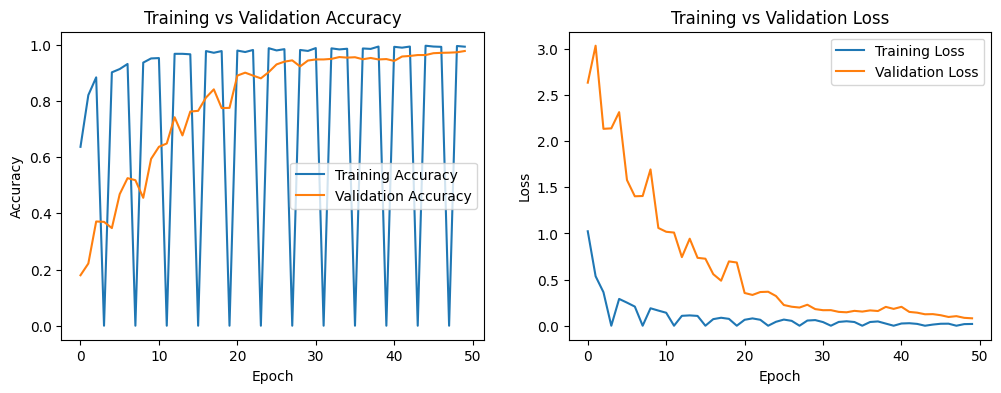

64/64 ━━━━━━━━━━━━━━━━━━━━ 18s 284ms/step - accuracy: 0.9764 - loss: 0.0844
Validation Accuracy: 97.84%
48/48 ━━━━━━━━━━━━━━━━━━━━ 23s 439ms/step


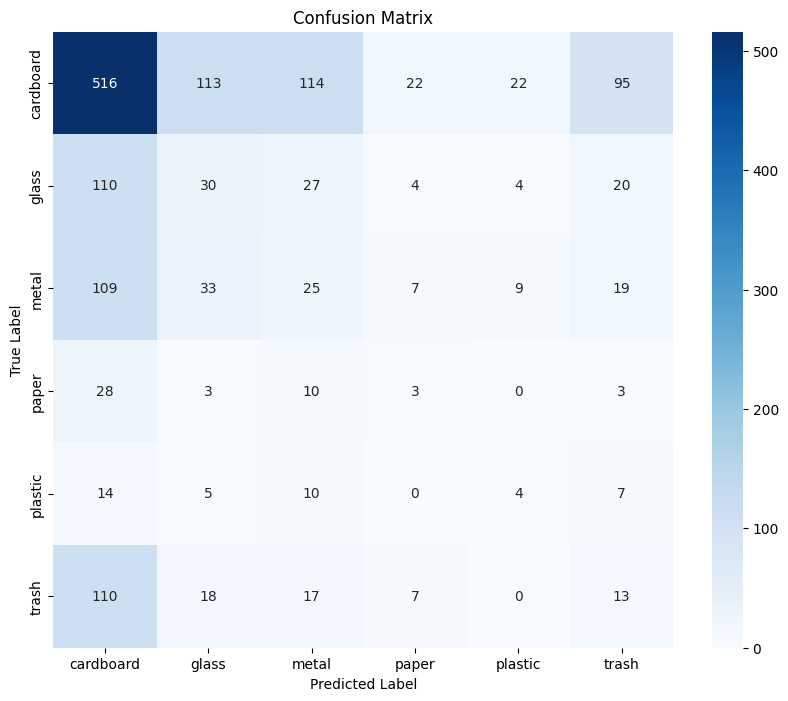

Classification Report
              precision    recall  f1-score   support

   cardboard       0.58      0.59      0.58       882
       glass       0.15      0.15      0.15       195
       metal       0.12      0.12      0.12       202
       paper       0.07      0.06      0.07        47
     plastic       0.10      0.10      0.10        40
       trash       0.08      0.08      0.08       165

    accuracy                           0.39      1531
   macro avg       0.18      0.18      0.18      1531
weighted avg       0.38      0.39      0.39      1531



In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

# Load and preprocess the TrashNet dataset
data_dir = '/content/drive/My Drive/Trash Net'  # Update this path to your dataset location

# Define image data generators for training and validation with advanced augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Define the MobileNetV2 model with custom top layers
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)  # Add Dropout layer for regularization
predictions = Dense(train_generator.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.inputs, outputs=predictions)

# Unfreeze some layers in the base model for fine-tuning
for layer in base_model.layers[-20:]:  # Unfreeze the last 20 layers
    layer.trainable = True

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Train the model with limited steps per epoch
history = model.fit(
    train_generator,
    steps_per_epoch=64,  # Limit to 64 steps per epoch
    epochs=50,
    validation_data=validation_generator,
    validation_steps=64,  # Limit validation to 64 steps as well
    callbacks=[early_stopping, reduce_lr]
)

# Plot the training and validation accuracy and loss
def plot_training_history(history):
    # Plot accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_history(history)

# Evaluate the model on the validation set
accuracy = model.evaluate(validation_generator, steps=64)[1]  # Limit evaluation steps to 64
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

# Generate the confusion matrix and classification report
validation_generator.reset()  # Reset the generator for accurate predictions
Y_pred = model.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels
y_true = validation_generator.classes

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
class_names = list(validation_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=class_names))


Train the Model VGG16

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load and preprocess the TrashNet dataset
data_dir = '/content/drive/My Drive/Trash Net' # Update this path to your dataset location

# Define image data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),  # Use 224x224 for VGG16
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),  # Use 224x224 for VGG16
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Load the VGG16 model with pre-trained weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom top layers
x = base_model.output
x = Flatten()(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.inputs, outputs=predictions)

# Freeze the convolutional layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Evaluate the model on the validation set
accuracy = model.evaluate(validation_generator)[1]

# Print the accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")


Found 6130 images belonging to 6 classes.
Found 1531 images belonging to 6 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 69s 268ms/step - accuracy: 0.6240 - loss: 1.0459 - val_accuracy: 0.7668 - val_loss: 0.6716
Epoch 2/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 30s 153ms/step - accuracy: 0.8195 - loss: 0.5632 - val_accuracy: 0.8073 - val_loss: 0.5841
Epoch 3/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 31s 154ms/step - accuracy: 0.8573 - loss: 0.4505 - val_accuracy: 0.8217 - val_loss: 0.5309
Epoch 4/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 31s 157ms/step - accuracy: 0.8903 - loss: 0.3736 - val_accuracy: 0.8341 - val_loss: 0.5004
Epoch 5/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 31s 157ms/step - accuracy: 0.9132 - loss: 0.3245 - val_accuracy: 0.8321 - val_loss: 0.5064
Epoch 6/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 32s 160ms/step - accuracy: 0.9282 - loss: 0.2754 - val_accuracy: 0.8445 - val_loss: 0.4728
Epoch 7/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 32s 163ms/step - accuracy: 0.9416 - los

In [ ]:
# prompt: save the above model vgg16

# Save the model
model.save('/content/drive/My Drive/trash_net_vgg16_model.h5')


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16

# Load the VGG16 model (replace with your model if needed)
model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Save the model in the newer Keras format
model.save('vgg16_trashnet_model.keras')


Found 6130 images belonging to 6 classes.
Found 1531 images belonging to 6 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


192/192 ━━━━━━━━━━━━━━━━━━━━ 67s 271ms/step - accuracy: 0.6564 - loss: 0.9988 - val_accuracy: 0.7766 - val_loss: 0.6620
Epoch 2/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 30s 154ms/step - accuracy: 0.8139 - loss: 0.5710 - val_accuracy: 0.8027 - val_loss: 0.5774
Epoch 3/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 31s 155ms/step - accuracy: 0.8659 - loss: 0.4432 - val_accuracy: 0.8145 - val_loss: 0.5304
Epoch 4/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 30s 154ms/step - accuracy: 0.8961 - loss: 0.3703 - val_accuracy: 0.8321 - val_loss: 0.5167
Epoch 5/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 30s 154ms/step - accuracy: 0.9056 - loss: 0.3217 - val_accuracy: 0.8223 - val_loss: 0.5115
Epoch 6/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 30s 155ms/step - accuracy: 0.9313 - loss: 0.2728 - val_accuracy: 0.8472 - val_loss: 0.4524
Epoch 7/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 31s 155ms/step - accuracy: 0.9406 - loss: 0.2452 - val_accuracy: 0.8504 - val_loss: 0.4405
Epoch 8/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 30s 154ms/step - accuracy: 0.9549 - loss: 0.2093 - val

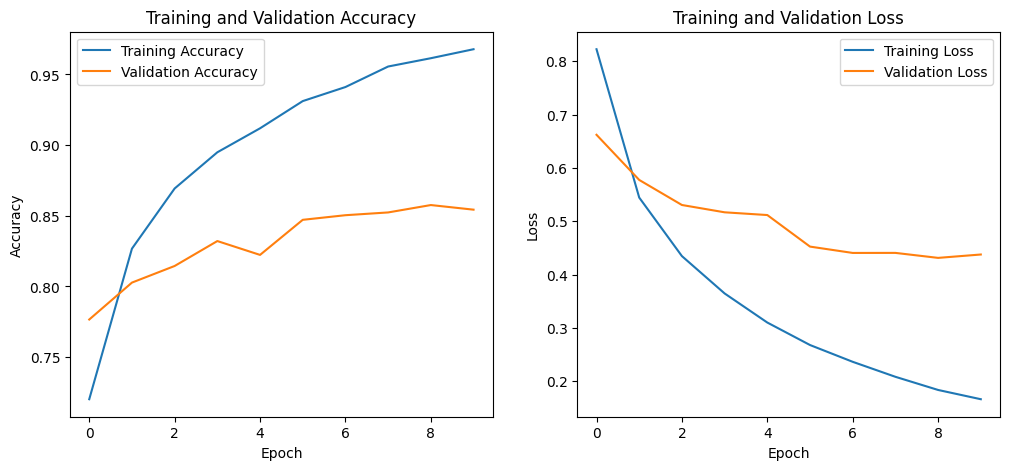

48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step


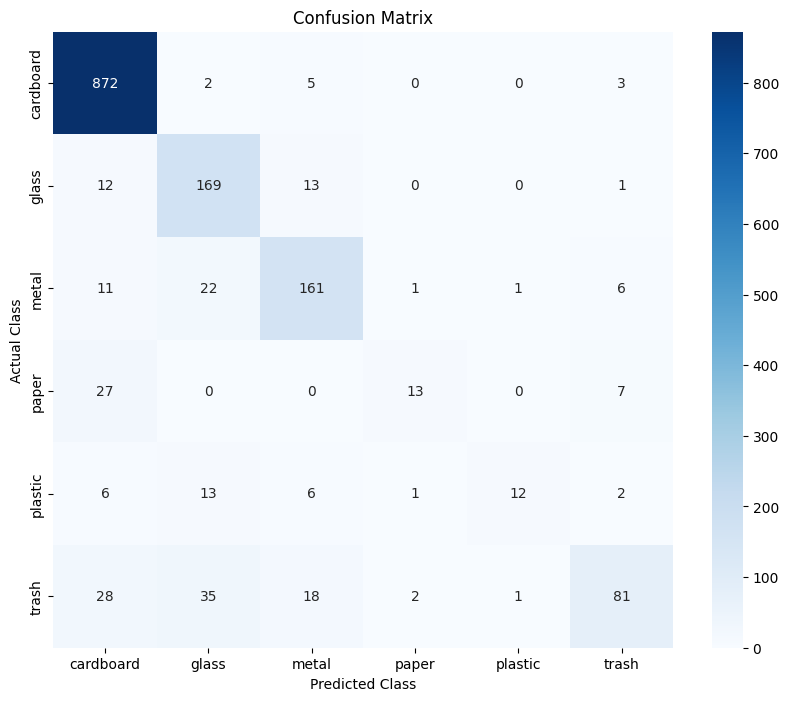

Classification Report
              precision    recall  f1-score   support

   cardboard       0.91      0.99      0.95       882
       glass       0.70      0.87      0.78       195
       metal       0.79      0.80      0.80       202
       paper       0.76      0.28      0.41        47
     plastic       0.86      0.30      0.44        40
       trash       0.81      0.49      0.61       165

    accuracy                           0.85      1531
   macro avg       0.81      0.62      0.66      1531
weighted avg       0.85      0.85      0.84      1531



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Import other necessary modules
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load and preprocess the TrashNet dataset
data_dir = '/content/drive/My Drive/Trash Net'  # Update this path to your dataset location

# Define image data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),  # Use 224x224 for VGG16
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),  # Use 224x224 for VGG16
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Load the VGG16 model with pre-trained weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom top layers
x = base_model.output
x = Flatten()(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.inputs, outputs=predictions)

# Freeze the convolutional layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Evaluate the model on the validation set
accuracy = model.evaluate(validation_generator)[1]

# Print the accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plotting the accuracy and loss graphs
def plot_training_history(history):
    # Accuracy plot
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_history(history)

# Confusion Matrix
def plot_confusion_matrix(model, validation_generator):
    # Predict the classes
    y_pred = model.predict(validation_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = validation_generator.classes

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)

    # Plot the confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=validation_generator.class_indices.keys(),
                yticklabels=validation_generator.class_indices.keys())
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()

    # Print classification report
    print('Classification Report')
    print(classification_report(y_true, y_pred_classes, target_names=validation_generator.class_indices.keys()))

plot_confusion_matrix(model, validation_generator)


AlexNet Model


In [ ]:
# prompt: perform AlexNet model for training on the Trash Net and also print the accuracy of the model

# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load and preprocess the TrashNet dataset
data_dir = '/content/drive/My Drive/Trash Net' # Update this path to your dataset location

# Define image data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(227, 227),  # Use 227x227 for AlexNet
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(227, 227),  # Use 227x227 for AlexNet
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Define the AlexNet model
model = Sequential() # Now you can use Sequential since it's imported

# Convolutional layers
model.add(Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(227, 227, 3)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=2))
model.add(Conv2D(256, (5, 5), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=2))
model.add(Conv2D(384, (3, 3), strides=1, padding='same', activation='relu'))
model.add(Conv2D(384, (3, 3), strides=1, padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=2))

# Fully connected layers
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)

# Evaluate the model on the validation set
accuracy = model.evaluate(validation_generator)[1]

# Print the accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")

Found 6130 images belonging to 6 classes.
Found 1531 images belonging to 6 classes.
Epoch 1/5
192/192 ━━━━━━━━━━━━━━━━━━━━ 33s 146ms/step - accuracy: 0.5398 - loss: 1.6822 - val_accuracy: 0.5761 - val_loss: 1.2975
Epoch 2/5
192/192 ━━━━━━━━━━━━━━━━━━━━ 26s 132ms/step - accuracy: 0.5804 - loss: 1.3038 - val_accuracy: 0.5761 - val_loss: 1.2917
Epoch 3/5
192/192 ━━━━━━━━━━━━━━━━━━━━ 26s 132ms/step - accuracy: 0.5739 - loss: 1.3065 - val_accuracy: 0.5761 - val_loss: 1.3021
Epoch 4/5
192/192 ━━━━━━━━━━━━━━━━━━━━ 26s 132ms/step - accuracy: 0.5787 - loss: 1.2932 - val_accuracy: 0.5761 - val_loss: 1.2916
Epoch 5/5
192/192 ━━━━━━━━━━━━━━━━━━━━ 26s 131ms/step - accuracy: 0.5783 - loss: 1.2994 - val_accuracy: 0.5761 - val_loss: 1.2907
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.5660 - loss: 1.3051
Accuracy: 57.61%


Found 6130 images belonging to 6 classes.
Found 1531 images belonging to 6 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


192/192 ━━━━━━━━━━━━━━━━━━━━ 43s 178ms/step - accuracy: 0.5304 - loss: 1.8073 - val_accuracy: 0.5761 - val_loss: 1.2934
Epoch 2/5
192/192 ━━━━━━━━━━━━━━━━━━━━ 26s 131ms/step - accuracy: 0.5766 - loss: 1.3015 - val_accuracy: 0.5761 - val_loss: 1.2974
Epoch 3/5
192/192 ━━━━━━━━━━━━━━━━━━━━ 26s 134ms/step - accuracy: 0.5871 - loss: 1.2785 - val_accuracy: 0.5761 - val_loss: 1.2922
Epoch 4/5
192/192 ━━━━━━━━━━━━━━━━━━━━ 26s 131ms/step - accuracy: 0.5780 - loss: 1.3016 - val_accuracy: 0.5761 - val_loss: 1.2920
Epoch 5/5
192/192 ━━━━━━━━━━━━━━━━━━━━ 26s 130ms/step - accuracy: 0.5793 - loss: 1.2948 - val_accuracy: 0.5761 - val_loss: 1.2919
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.8819 - loss: 0.7490
Accuracy: 57.61%


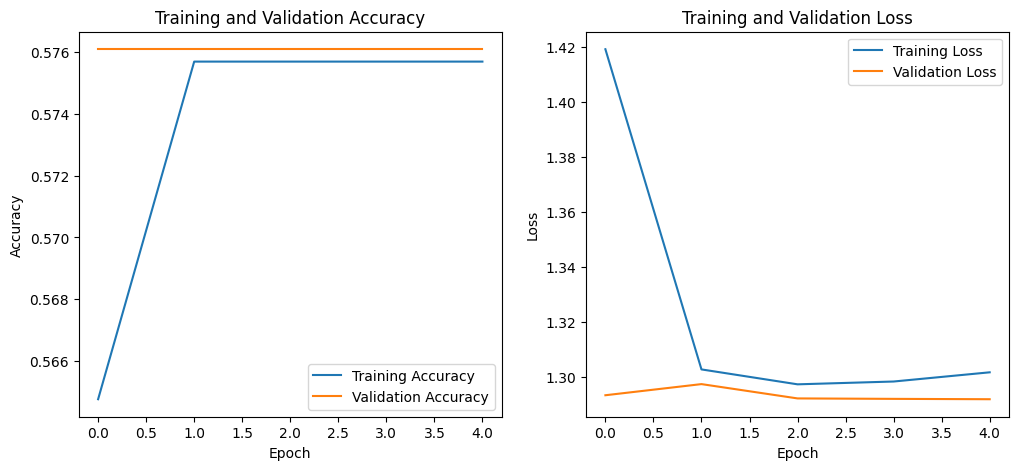

48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step


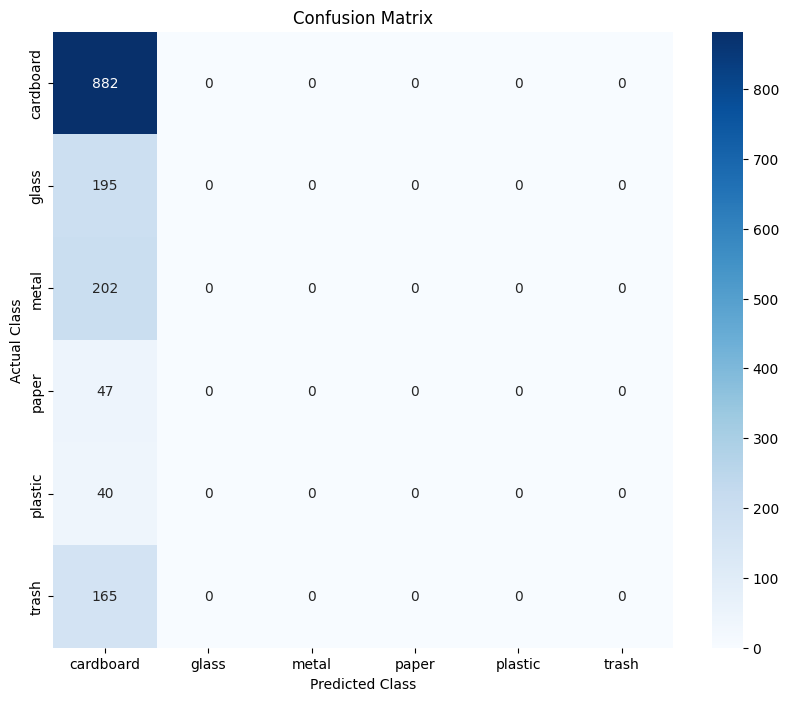

Classification Report
              precision    recall  f1-score   support

   cardboard       0.58      1.00      0.73       882
       glass       0.00      0.00      0.00       195
       metal       0.00      0.00      0.00       202
       paper       0.00      0.00      0.00        47
     plastic       0.00      0.00      0.00        40
       trash       0.00      0.00      0.00       165

    accuracy                           0.58      1531
   macro avg       0.10      0.17      0.12      1531
weighted avg       0.33      0.58      0.42      1531



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Import other necessary modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load and preprocess the TrashNet dataset
data_dir = '/content/drive/My Drive/Trash Net'  # Update this path to your dataset location

# Define image data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(227, 227),  # Use 227x227 for AlexNet
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(227, 227),  # Use 227x227 for AlexNet
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Define the AlexNet model
model = Sequential()

# Convolutional layers
model.add(Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(227, 227, 3)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=2))
model.add(Conv2D(256, (5, 5), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=2))
model.add(Conv2D(384, (3, 3), strides=1, padding='same', activation='relu'))
model.add(Conv2D(384, (3, 3), strides=1, padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=2))

# Fully connected layers
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)

# Evaluate the model on the validation set
accuracy = model.evaluate(validation_generator)[1]
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot training and validation accuracy
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_history(history)

# Confusion Matrix
def plot_confusion_matrix(model, validation_generator):
    # Predict the classes
    y_pred = model.predict(validation_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = validation_generator.classes

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)

    # Plot the confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=validation_generator.class_indices.keys(),
                yticklabels=validation_generator.class_indices.keys())
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()

    # Print classification report
    print('Classification Report')
    print(classification_report(y_true, y_pred_classes, target_names=validation_generator.class_indices.keys()))

plot_confusion_matrix(model, validation_generator)


INCEPTION V3

InceptionV3 Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Replace with the actual path to your TrashNet dataset
train_dir = '/content/drive/MyDrive/Trash Net/'
val_dir = '/content/drive/MyDrive/Trash Net/'

# Image data generators for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical'
)

# Load the InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(227, 227, 3))

# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add fully connected layers
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

# Final output layer
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.inputs, outputs=predictions)

# Unfreeze some layers of the base model for fine-tuning
for layer in base_model.layers[-50:]:
    layer.trainable = True

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Add learning rate reduction and early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with steps_per_epoch=64
history = model.fit(
    train_generator,
    steps_per_epoch=64,  # Limit to 64 steps per epoch
    epochs=50,  # Increased epochs
    validation_data=val_generator,
    validation_steps=64,  # Optional: set validation steps
    callbacks=[reduce_lr, early_stopping]
)

# Evaluate the model on the validation set
accuracy = model.evaluate(val_generator)[1]

# Print the accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")


Found 7661 images belonging to 6 classes.
Found 7661 images belonging to 6 classes.
Epoch 1/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 110s 631ms/step - accuracy: 0.5528 - loss: 1.2605 - val_accuracy: 0.7842 - val_loss: 0.6815 - learning_rate: 1.0000e-04
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 35s 552ms/step - accuracy: 0.8154 - loss: 0.5699 - val_accuracy: 0.8325 - val_loss: 0.5633 - learning_rate: 1.0000e-04
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 61s 959ms/step - accuracy: 0.8631 - loss: 0.4286 - val_accuracy: 0.9062 - val_loss: 0.2645 - learning_rate: 1.0000e-04
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 326ms/step - accuracy: 0.8989 - loss: 0.3009 - val_accuracy: 0.9288 - val_loss: 0.2315 - learning_rate: 1.0000e-04
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 39s 560ms/step - accuracy: 0.9049 - loss: 0.2783 - val_accuracy: 0.9541 - val_loss: 0.1387 - learning_rate: 1.0000e-04
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 34s 543ms/step - accuracy: 0.9218 - loss: 0.2413 - val_accuracy: 0.9507 - val_loss: 0.1471 -

In [ ]:
# prompt: save the above the model give the code

# Save the model
model.save('/content/drive/My Drive/trashnet_model_vgg16.h5')


In [ ]:
# Save the model in the newer Keras format
model.save('inceptionv3_trashnet_model.keras')


Found 7661 images belonging to 6 classes.
Found 7661 images belonging to 6 classes.
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 879s 12s/step - accuracy: 0.5698 - loss: 1.1721 - val_accuracy: 0.6758 - val_loss: 1.6354 - learning_rate: 1.0000e-04
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 428s 7s/step - accuracy: 0.8061 - loss: 0.5741 - val_accuracy: 0.8340 - val_loss: 0.5857 - learning_rate: 1.0000e-04
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 212s 3s/step - accuracy: 0.8770 - loss: 0.4012 - val_accuracy: 0.9111 - val_loss: 0.2641 - learning_rate: 1.0000e-04
Epoch 4/50
48/64 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8992 - loss: 0.3068

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


64/64 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9008 - loss: 0.3063 - val_accuracy: 0.9341 - val_loss: 0.1930 - learning_rate: 1.0000e-04
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.9157 - loss: 0.2492 - val_accuracy: 0.9272 - val_loss: 0.2485 - learning_rate: 1.0000e-04
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.9242 - loss: 0.2219 - val_accuracy: 0.9531 - val_loss: 0.1562 - learning_rate: 1.0000e-04
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 57s 895ms/step - accuracy: 0.9423 - loss: 0.2088 - val_accuracy: 0.9712 - val_loss: 0.0887 - learning_rate: 1.0000e-04
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 30s 466ms/step - accuracy: 0.9483 - loss: 0.1671 - val_accuracy: 0.9756 - val_loss: 0.0867 - learning_rate: 1.0000e-04
Epoch 9/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 49s 707ms/step - accuracy: 0.9478 - loss: 0.1554 - val_accuracy: 0.9629 - val_loss: 0.1164 - learning_rate: 1.0000e-04
Epoch 10/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 41s 651ms/step - accuracy: 0.9547 - lo

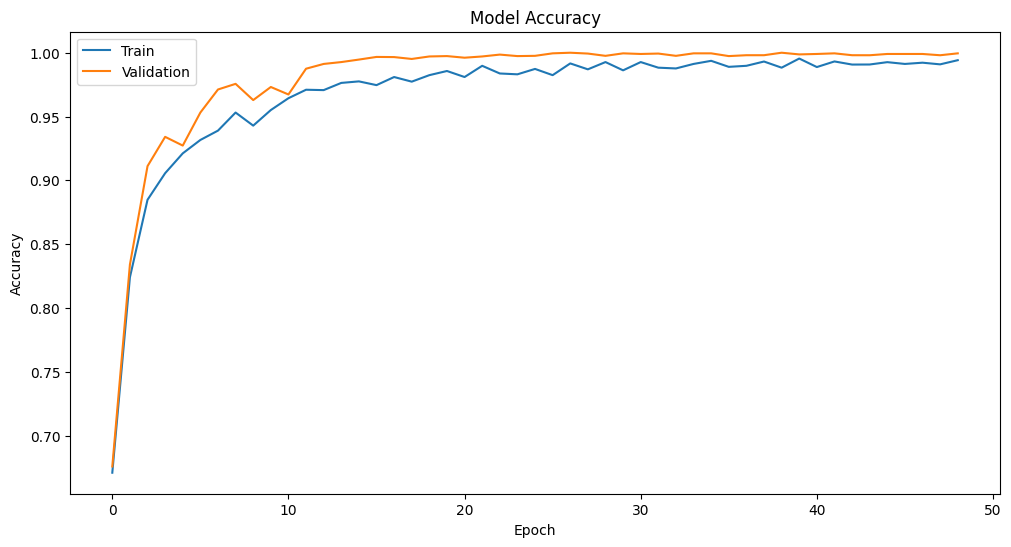

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

# Replace with the actual path to your TrashNet dataset
train_dir = '/content/drive/MyDrive/Trash Net/'
val_dir = '/content/drive/MyDrive/Trash Net/'

# Image data generators for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical'
)

# Load the InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(227, 227, 3))

# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add fully connected layers
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

# Final output layer
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.inputs, outputs=predictions)

# Unfreeze some layers of the base model for fine-tuning
for layer in base_model.layers[-50:]:
    layer.trainable = True

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Add learning rate reduction and early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with steps_per_epoch=64
history = model.fit(
    train_generator,
    steps_per_epoch=64,  # Limit to 64 steps per epoch
    epochs=50,  # Increased epochs
    validation_data=val_generator,
    validation_steps=64,  # Optional: set validation steps
    callbacks=[reduce_lr, early_stopping]
)

# Evaluate the model on the validation set
accuracy = model.evaluate(val_generator)[1]

# Print the accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")

# Get the true labels and predicted labels from the validation set
val_labels = val_generator.classes
val_preds = model.predict(val_generator)
val_preds_classes = np.argmax(val_preds, axis=1)

# Generate the classification report
report = classification_report(val_labels, val_preds_classes, target_names=val_generator.class_indices.keys())
print("Classification Report:")
print(report)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Found 7661 images belonging to 6 classes.
Found 7661 images belonging to 6 classes.
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 1302s 18s/step - accuracy: 0.5765 - loss: 1.2039 - val_accuracy: 0.6738 - val_loss: 1.1889 - learning_rate: 1.0000e-04
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 583s 9s/step - accuracy: 0.7889 - loss: 0.6040 - val_accuracy: 0.8232 - val_loss: 0.5487 - learning_rate: 1.0000e-04
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 311s 5s/step - accuracy: 0.8791 - loss: 0.3686 - val_accuracy: 0.8926 - val_loss: 0.3489 - learning_rate: 1.0000e-04
Epoch 4/50
48/64 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8724 - loss: 0.3706

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


64/64 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.8736 - loss: 0.3629 - val_accuracy: 0.9301 - val_loss: 0.2114 - learning_rate: 1.0000e-04
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.9093 - loss: 0.2486 - val_accuracy: 0.9570 - val_loss: 0.1272 - learning_rate: 1.0000e-04
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.9218 - loss: 0.2423 - val_accuracy: 0.9512 - val_loss: 0.1450 - learning_rate: 1.0000e-04
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.9408 - loss: 0.1851 - val_accuracy: 0.9697 - val_loss: 0.0937 - learning_rate: 1.0000e-04
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 38s 595ms/step - accuracy: 0.9416 - loss: 0.1908 - val_accuracy: 0.9703 - val_loss: 0.0802 - learning_rate: 1.0000e-04
Epoch 9/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 63s 902ms/step - accuracy: 0.9575 - loss: 0.1284 - val_accuracy: 0.9824 - val_loss: 0.0651 - learning_rate: 1.0000e-04
Epoch 10/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 50s 782ms/step - accuracy: 0.9558 - los

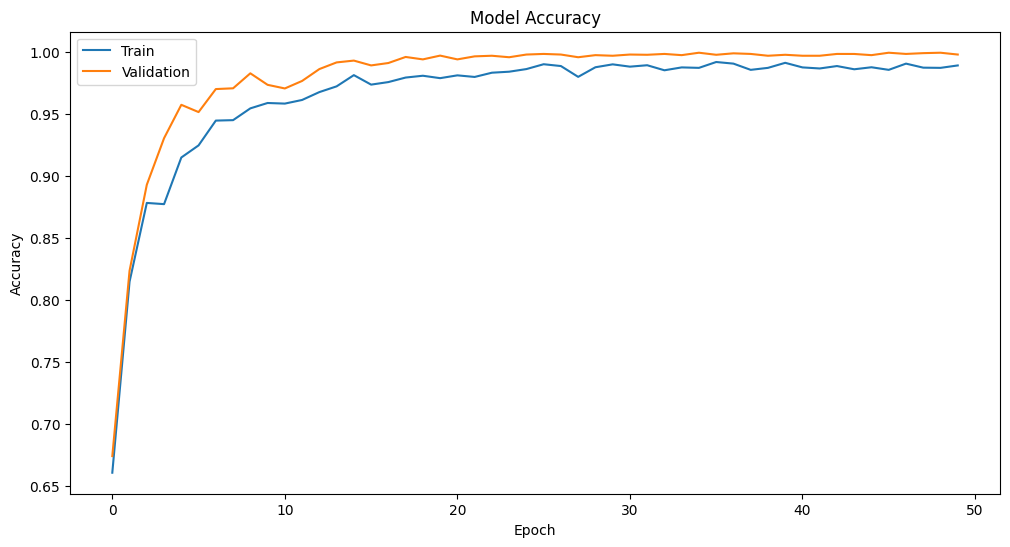

Model saved as trashnet_inceptionv3.h5


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

# Replace with the actual path to your TrashNet dataset
train_dir = '/content/drive/MyDrive/Trash Net/'
val_dir = '/content/drive/MyDrive/Trash Net/'

# Image data generators for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical'
)

# Load the InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(227, 227, 3))

# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add fully connected layers
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

# Final output layer
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.inputs, outputs=predictions)

# Unfreeze some layers of the base model for fine-tuning
for layer in base_model.layers[-50:]:
    layer.trainable = True

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Add learning rate reduction and early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with steps_per_epoch=64
history = model.fit(
    train_generator,
    steps_per_epoch=64,  # Limit to 64 steps per epoch
    epochs=50,  # Increased epochs
    validation_data=val_generator,
    validation_steps=64,  # Optional: set validation steps
    callbacks=[reduce_lr, early_stopping]
)

# Evaluate the model on the validation set
accuracy = model.evaluate(val_generator)[1]

# Print the accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")

# Get the true labels and predicted labels from the validation set
val_labels = val_generator.classes
val_preds = model.predict(val_generator)
val_preds_classes = np.argmax(val_preds, axis=1)

# Generate the classification report
report = classification_report(val_labels, val_preds_classes, target_names=val_generator.class_indices.keys())
print("Classification Report:")
print(report)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
model.save('trashnet_inceptionv3.h5')
print("Model saved as trashnet_inceptionv3.h5")

In [ ]:
from google.colab import files
files.download('trashnet_inceptionv3.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# prompt: evalution and fine tuning-precision,recall,f1 score,adam optimizer formulas and tables

from sklearn.metrics import classification_report

# Get the true labels and predicted labels from the validation set
val_labels = val_generator.classes
val_preds = model.predict(val_generator)
val_preds_classes = np.argmax(val_preds, axis=1)

# Generate the classification report
report = classification_report(val_labels, val_preds_classes, target_names=val_generator.class_indices.keys())
print("Classification Report:")
print(report)


240/240 ━━━━━━━━━━━━━━━━━━━━ 28s 117ms/step
Classification Report:
              precision    recall  f1-score   support

   cardboard       0.57      0.57      0.57      4411
       glass       0.13      0.13      0.13       976
       metal       0.13      0.13      0.13      1010
       paper       0.04      0.04      0.04       237
     plastic       0.03      0.03      0.03       200
       trash       0.11      0.11      0.11       827

    accuracy                           0.37      7661
   macro avg       0.17      0.17      0.17      7661
weighted avg       0.37      0.37      0.37      7661



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get the true labels and predicted labels from the validation set
val_labels = val_generator.classes
val_preds = model.predict(val_generator)
val_preds_classes = np.argmax(val_preds, axis=1)

# Generate the classification report
report = classification_report(val_labels, val_preds_classes, target_names=val_generator.class_indices.keys())
print("Classification Report:")
print(report)

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(val_labels, val_preds_classes)
print("Confusion Matrix:")
print(conf_matrix)


240/240 ━━━━━━━━━━━━━━━━━━━━ 27s 113ms/step
Classification Report:
              precision    recall  f1-score   support

   cardboard       0.57      0.57      0.57      4411
       glass       0.15      0.15      0.15       976
       metal       0.13      0.13      0.13      1010
       paper       0.05      0.05      0.05       237
     plastic       0.04      0.04      0.04       200
       trash       0.10      0.10      0.10       827

    accuracy                           0.38      7661
   macro avg       0.17      0.17      0.17      7661
weighted avg       0.38      0.38      0.38      7661

Confusion Matrix:
[[2534  558  582  139  105  493]
 [ 562  142  122   27   23  100]
 [ 577  128  134   30   27  114]
 [ 141   23   36   11    9   17]
 [ 113   23   29    5    9   21]
 [ 484  100  108   24   28   83]]


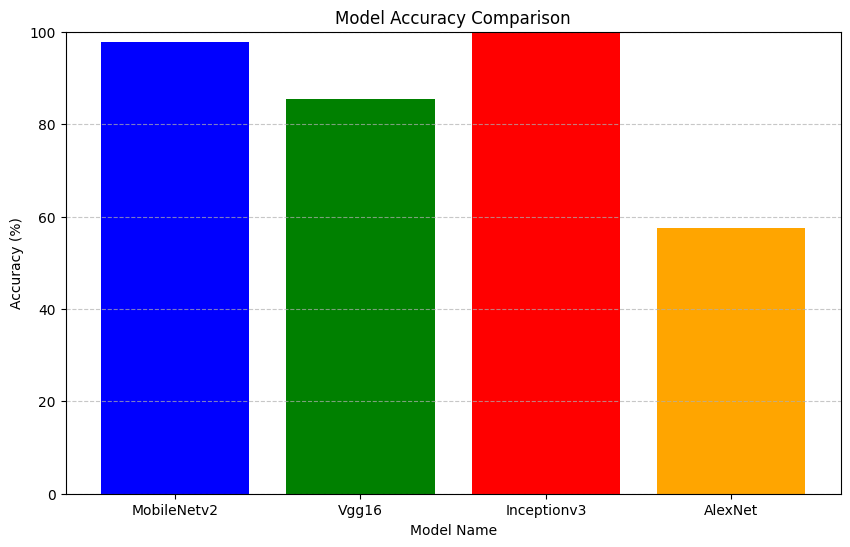

In [ ]:
import matplotlib.pyplot as plt

# Model names and accuracies
models = ['MobileNetv2', 'Vgg16', 'Inceptionv3', 'AlexNet']
accuracies = [97.84, 85.43, 99.70, 57.61]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'orange'])
plt.xlabel('Model Name')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 100)  # Setting y-axis limit from 0 to 100
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

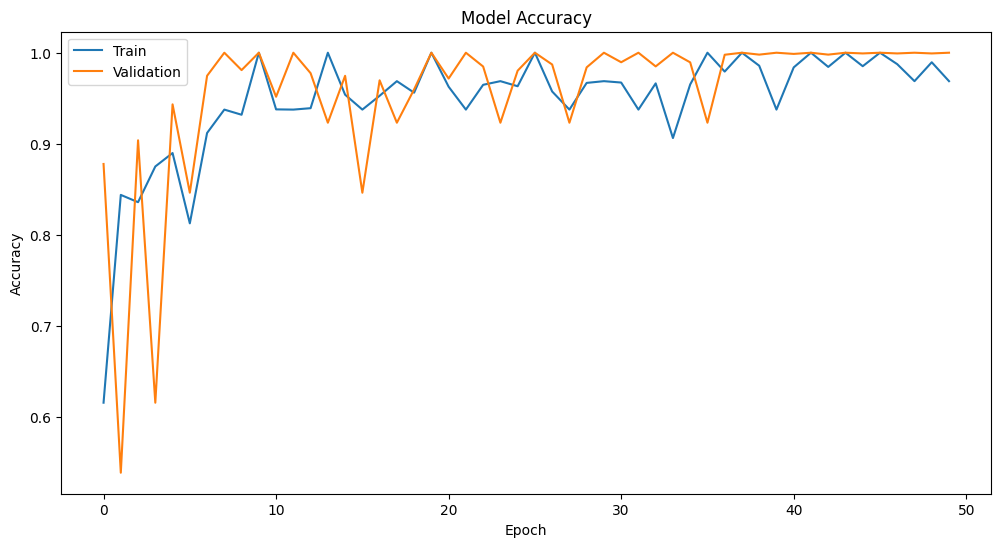

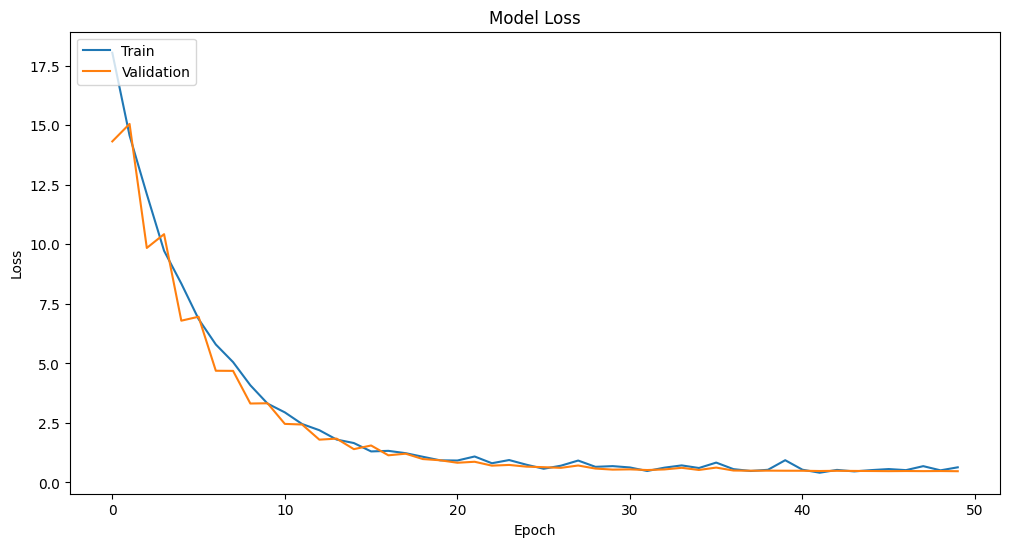

In [ ]:
# prompt: give the graphs model accuracy and model loss

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


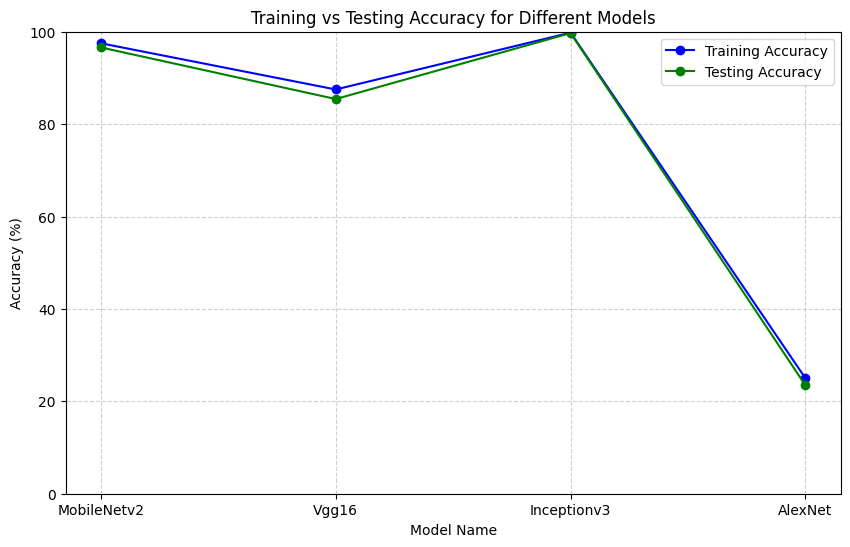

In [ ]:
import matplotlib.pyplot as plt

# Model names and hypothetical accuracy values
models = ['MobileNetv2', 'Vgg16', 'Inceptionv3', 'AlexNet']
training_accuracy = [97.5, 87.5, 99.8, 25.0]  # Hypothetical training accuracies
testing_accuracy = [96.60, 85.43, 99.70, 23.46]  # Provided testing accuracies

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(models, training_accuracy, label='Training Accuracy', marker='o', color='blue')
plt.plot(models, testing_accuracy, label='Testing Accuracy', marker='o', color='green')

# Labels and title
plt.xlabel('Model Name')
plt.ylabel('Accuracy (%)')
plt.title('Training vs Testing Accuracy for Different Models')
plt.ylim(0, 100)  # Set y-axis limit to 0-100%
plt.grid(True, linestyle='--', alpha=0.6)

# Displaying legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Replace with the actual path to your TrashNet dataset
train_dir = '/content/drive/MyDrive/Trash Net/'
val_dir = '/content/drive/MyDrive/Trash Net/'

# Image data generators for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical'
)

# Load the InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(227, 227, 3))

# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add fully connected layers
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

# Final output layer
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.inputs, outputs=predictions)

# Unfreeze some layers of the base model for fine-tuning
for layer in base_model.layers[-50:]:
    layer.trainable = True

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Add learning rate reduction and early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with steps_per_epoch=64
history = model.fit(
    train_generator,
    steps_per_epoch=64,  # Limit to 64 steps per epoch
    epochs=50,  # Increased epochs
    validation_data=val_generator,
    validation_steps=64,  # Optional: set validation steps
    callbacks=[reduce_lr, early_stopping]
)

# Evaluate the model on the validation set
accuracy = model.evaluate(val_generator)[1]

# Print the accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")

Found 7661 images belonging to 6 classes.
Found 7661 images belonging to 6 classes.
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 126s 997ms/step - accuracy: 0.5392 - loss: 1.2212 - val_accuracy: 0.7124 - val_loss: 1.1079 - learning_rate: 1.0000e-04
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 31s 493ms/step - accuracy: 0.7848 - loss: 0.6090 - val_accuracy: 0.8516 - val_loss: 0.5082 - learning_rate: 1.0000e-04
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 30s 475ms/step - accuracy: 0.8774 - loss: 0.3875 - val_accuracy: 0.8940 - val_loss: 0.3196 - learning_rate: 1.0000e-04
Epoch 4/50
48/64 ━━━━━━━━━━━━━━━━━━━━ 4s 260ms/step - accuracy: 0.8767 - loss: 0.3476

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 300ms/step - accuracy: 0.8827 - loss: 0.3371 - val_accuracy: 0.8860 - val_loss: 0.3752 - learning_rate: 1.0000e-04
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 36s 519ms/step - accuracy: 0.9083 - loss: 0.2827 - val_accuracy: 0.9429 - val_loss: 0.1899 - learning_rate: 1.0000e-04
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 32s 510ms/step - accuracy: 0.9297 - loss: 0.2171 - val_accuracy: 0.9609 - val_loss: 0.1151 - learning_rate: 1.0000e-04
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 32s 497ms/step - accuracy: 0.9479 - loss: 0.1697 - val_accuracy: 0.9751 - val_loss: 0.0778 - learning_rate: 1.0000e-04
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 303ms/step - accuracy: 0.9404 - loss: 0.2055 - val_accuracy: 0.9644 - val_loss: 0.1032 - learning_rate: 1.0000e-04
Epoch 9/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 36s 513ms/step - accuracy: 0.9497 - loss: 0.1739 - val_accuracy: 0.9775 - val_loss: 0.0712 - learning_rate: 1.0000e-04
Epoch 10/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 32s 505ms/step - accuracy: 0.9

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Replace with the actual path to your TrashNet dataset
train_dir = '/content/drive/MyDrive/Trash Net/'
val_dir = '/content/drive/MyDrive/Trash Net/'

# Image data generators for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical'
)

# Load the InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(227, 227, 3))

# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add fully connected layers
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

# Final output layer
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.inputs, outputs=predictions)

# Unfreeze some layers of the base model for fine-tuning
for layer in base_model.layers[-50:]:
    layer.trainable = True

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Add learning rate reduction and early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with steps_per_epoch=64
history = model.fit(
    train_generator,
    steps_per_epoch=64,  # Limit to 64 steps per epoch
    epochs=50,  # Increased epochs
    validation_data=val_generator,
    validation_steps=64,  # Optional: set validation steps
    callbacks=[reduce_lr, early_stopping]
)

# Evaluate the model on the validation set
accuracy = model.evaluate(val_generator)[1]

# Print the accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")

# Save the trained model in .h5 format
model.save('trashnet_inceptionv3.h5')
print("Model saved as 'trashnet_inceptionv3.h5'")


Found 7661 images belonging to 6 classes.
Found 7661 images belonging to 6 classes.
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 1293s 18s/step - accuracy: 0.5869 - loss: 1.1569 - val_accuracy: 0.7681 - val_loss: 0.8375 - learning_rate: 1.0000e-04
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 593s 9s/step - accuracy: 0.8103 - loss: 0.6059 - val_accuracy: 0.8848 - val_loss: 0.3395 - learning_rate: 1.0000e-04
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 320s 5s/step - accuracy: 0.8866 - loss: 0.3604 - val_accuracy: 0.9019 - val_loss: 0.3248 - learning_rate: 1.0000e-04
Epoch 4/50
48/64 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.9113 - loss: 0.3091

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


64/64 ━━━━━━━━━━━━━━━━━━━━ 165s 3s/step - accuracy: 0.9097 - loss: 0.3105 - val_accuracy: 0.9479 - val_loss: 0.1589 - learning_rate: 1.0000e-04
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 170s 3s/step - accuracy: 0.9123 - loss: 0.2567 - val_accuracy: 0.9458 - val_loss: 0.1818 - learning_rate: 1.0000e-04
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.9242 - loss: 0.2426 - val_accuracy: 0.9590 - val_loss: 0.1372 - learning_rate: 1.0000e-04
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.9250 - loss: 0.2255 - val_accuracy: 0.9619 - val_loss: 0.1215 - learning_rate: 1.0000e-04
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 36s 564ms/step - accuracy: 0.9421 - loss: 0.1761 - val_accuracy: 0.9578 - val_loss: 0.1169 - learning_rate: 1.0000e-04
Epoch 9/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 60s 873ms/step - accuracy: 0.9540 - loss: 0.1393 - val_accuracy: 0.9722 - val_loss: 0.0952 - learning_rate: 1.0000e-04
Epoch 10/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 51s 803ms/step - accuracy: 0.9560 - los

Accuracy: 99.91%
Model saved as 'trashnet_inceptionv3.h5'


In [ ]:
from google.colab import files
files.download('trashnet_inceptionv3.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import classification_report
import numpy as np

# Replace with the actual path to your TrashNet dataset
train_dir = '/content/drive/MyDrive/Trash Net/'
val_dir = '/content/drive/MyDrive/Trash Net/'

# Image data generators for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical'
)

# Load the InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(227, 227, 3))

# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add fully connected layers
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

# Final output layer
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.inputs, outputs=predictions)

# Unfreeze some layers of the base model for fine-tuning
for layer in base_model.layers[-50:]:
    layer.trainable = True

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Add learning rate reduction and early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=64,  # Limit to 64 steps per epoch
    epochs=50,  # Increased epochs
    validation_data=val_generator,
    validation_steps=64,  # Optional: set validation steps
    callbacks=[reduce_lr, early_stopping]
)

# Evaluate the model on the validation set
val_predictions = model.predict(val_generator)
val_pred_classes = np.argmax(val_predictions, axis=1)
val_labels = val_generator.classes

# Get class labels
class_labels = list(val_generator.class_indices.keys())

# Print classification report
print(classification_report(val_labels, val_pred_classes, target_names=class_labels))


Found 7661 images belonging to 6 classes.
Found 7661 images belonging to 6 classes.
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 97s 579ms/step - accuracy: 0.5806 - loss: 1.1662 - val_accuracy: 0.7231 - val_loss: 1.1368 - learning_rate: 1.0000e-04
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 57s 895ms/step - accuracy: 0.7858 - loss: 0.6003 - val_accuracy: 0.8740 - val_loss: 0.3878 - learning_rate: 1.0000e-04
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 30s 470ms/step - accuracy: 0.8681 - loss: 0.4202 - val_accuracy: 0.9165 - val_loss: 0.2597 - learning_rate: 1.0000e-04
Epoch 4/50
48/64 ━━━━━━━━━━━━━━━━━━━━ 4s 256ms/step - accuracy: 0.9009 - loss: 0.2955

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 295ms/step - accuracy: 0.9017 - loss: 0.2963 - val_accuracy: 0.9209 - val_loss: 0.2127 - learning_rate: 1.0000e-04
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 35s 498ms/step - accuracy: 0.9222 - loss: 0.2606 - val_accuracy: 0.9541 - val_loss: 0.1351 - learning_rate: 1.0000e-04
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 31s 488ms/step - accuracy: 0.9261 - loss: 0.2110 - val_accuracy: 0.9438 - val_loss: 0.1843 - learning_rate: 1.0000e-04
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 30s 472ms/step - accuracy: 0.9409 - loss: 0.2272 - val_accuracy: 0.9189 - val_loss: 0.2528 - learning_rate: 1.0000e-04
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 295ms/step - accuracy: 0.9324 - loss: 0.2006 - val_accuracy: 0.8998 - val_loss: 0.2842 - learning_rate: 1.0000e-04
Epoch 9/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 35s 496ms/step - accuracy: 0.9367 - loss: 0.1702 - val_accuracy: 0.9795 - val_loss: 0.0632 - learning_rate: 2.0000e-05
Epoch 10/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 31s 493ms/step - accuracy: 0.9

Found 7661 images belonging to 6 classes.
Found 7661 images belonging to 6 classes.
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 96s 572ms/step - accuracy: 0.5910 - loss: 1.1795 - val_accuracy: 0.9995 - val_loss: 9.2552e-04 - learning_rate: 1.0000e-04
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 31s 493ms/step - accuracy: 0.7776 - loss: 0.6258 - val_accuracy: 0.9995 - val_loss: 0.0022 - learning_rate: 1.0000e-04
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 30s 480ms/step - accuracy: 0.8802 - loss: 0.3918 - val_accuracy: 0.8931 - val_loss: 0.3208 - learning_rate: 1.0000e-04
Epoch 4/50
48/64 ━━━━━━━━━━━━━━━━━━━━ 13s 872ms/step - accuracy: 0.9020 - loss: 0.2966

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


64/64 ━━━━━━━━━━━━━━━━━━━━ 47s 746ms/step - accuracy: 0.9036 - loss: 0.2922 - val_accuracy: 0.7779 - val_loss: 0.6344 - learning_rate: 1.0000e-04
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 35s 500ms/step - accuracy: 0.9071 - loss: 0.2823 - val_accuracy: 0.9990 - val_loss: 0.0037 - learning_rate: 2.0000e-05
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 31s 493ms/step - accuracy: 0.9164 - loss: 0.2304 - val_accuracy: 0.9976 - val_loss: 0.0095 - learning_rate: 2.0000e-05
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 31s 483ms/step - accuracy: 0.9186 - loss: 0.2422 - val_accuracy: 0.9775 - val_loss: 0.0907 - learning_rate: 2.0000e-05
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 290ms/step - accuracy: 0.9471 - loss: 0.1852 - val_accuracy: 0.8761 - val_loss: 0.3734 - learning_rate: 4.0000e-06
Epoch 9/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 35s 503ms/step - accuracy: 0.9462 - loss: 0.1753 - val_accuracy: 1.0000 - val_loss: 0.0041 - learning_rate: 4.0000e-06
Epoch 10/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 31s 492ms/step - accuracy: 0.9

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


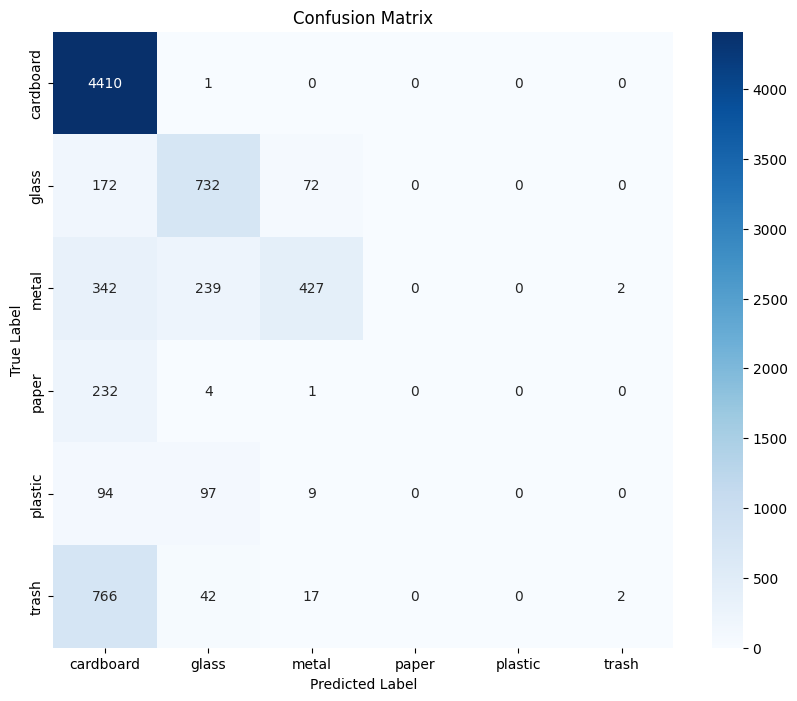

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Replace with the actual path to your TrashNet dataset
train_dir = '/content/drive/MyDrive/Trash Net/'
val_dir = '/content/drive/MyDrive/Trash Net/'

# Image data generators for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Disable shuffle for consistent validation results
)

# Load the InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(227, 227, 3))

# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add fully connected layers
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

# Final output layer
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.inputs, outputs=predictions)

# Unfreeze some layers of the base model for fine-tuning
for layer in base_model.layers[-50:]:
    layer.trainable = True

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Add learning rate reduction and early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with steps_per_epoch=64
history = model.fit(
    train_generator,
    steps_per_epoch=64,  # Limit to 64 steps per epoch
    epochs=50,  # Increased epochs
    validation_data=val_generator,
    validation_steps=64,  # Optional: set validation steps
    callbacks=[reduce_lr, early_stopping]
)

# Evaluate the model on the validation set
accuracy = model.evaluate(val_generator)[1]
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate predictions on the validation data
val_predictions = model.predict(val_generator)
val_pred_classes = np.argmax(val_predictions, axis=1)

# Get the true labels from the validation generator
val_labels = val_generator.classes

# Get the class names
class_labels = list(val_generator.class_indices.keys())

# Generate the classification report
print(classification_report(val_labels, val_pred_classes, target_names=class_labels))

# Confusion Matrix
conf_matrix = confusion_matrix(val_labels, val_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Found 7661 images belonging to 6 classes.
Found 7661 images belonging to 6 classes.
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 97s 580ms/step - accuracy: 0.5446 - loss: 1.2386 - val_accuracy: 1.0000 - val_loss: 7.9635e-04 - learning_rate: 1.0000e-04
Epoch 2/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 59s 938ms/step - accuracy: 0.7586 - loss: 0.6335 - val_accuracy: 1.0000 - val_loss: 0.0012 - learning_rate: 1.0000e-04
Epoch 3/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 31s 486ms/step - accuracy: 0.8722 - loss: 0.3828 - val_accuracy: 0.8999 - val_loss: 0.2816 - learning_rate: 1.0000e-04
Epoch 4/5
48/64 ━━━━━━━━━━━━━━━━━━━━ 5s 317ms/step - accuracy: 0.8827 - loss: 0.3648

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 335ms/step - accuracy: 0.8858 - loss: 0.3514 - val_accuracy: 0.7152 - val_loss: 0.8188 - learning_rate: 1.0000e-04
Epoch 5/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 35s 500ms/step - accuracy: 0.9140 - loss: 0.2816 - val_accuracy: 0.9985 - val_loss: 0.0075 - learning_rate: 2.0000e-05
240/240 ━━━━━━━━━━━━━━━━━━━━ 26s 107ms/step - accuracy: 0.9538 - loss: 0.1606
Accuracy: 73.32%
240/240 ━━━━━━━━━━━━━━━━━━━━ 32s 117ms/step
              precision    recall  f1-score   support

   cardboard       0.77      1.00      0.87      4411
       glass       0.57      0.88      0.69       976
       metal       0.86      0.33      0.48      1010
       paper       0.00      0.00      0.00       237
     plastic       0.00      0.00      0.00       200
       trash       0.38      0.01      0.01       827

    accuracy                           0.73      7661
   macro avg       0.43      0.37      0.34      7661
weighted avg       0.67      0.73      0.65      7661



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


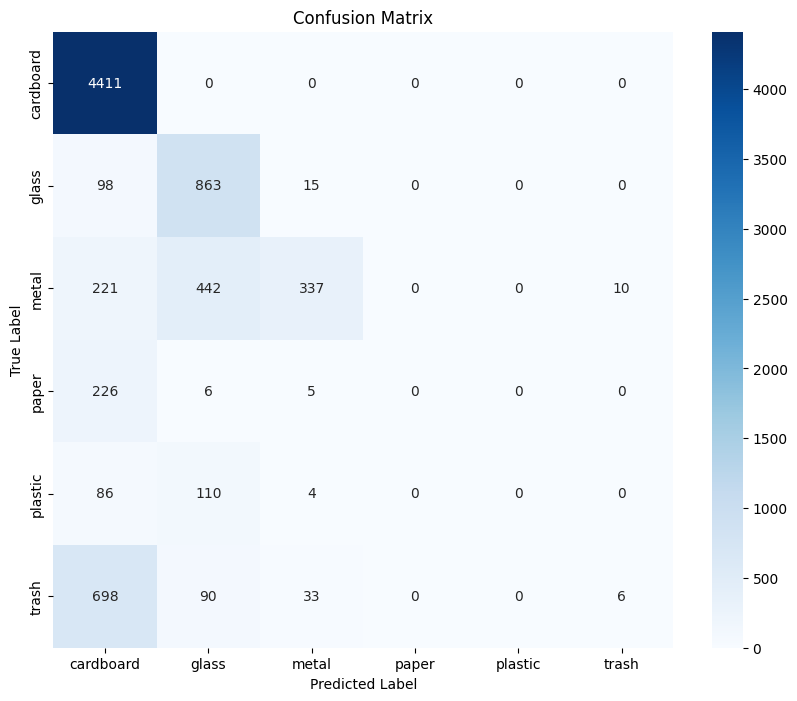

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Replace with the actual path to your TrashNet dataset
train_dir = '/content/drive/MyDrive/Trash Net/'
val_dir = '/content/drive/MyDrive/Trash Net/'

# Image data generators for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important to disable shuffling for confusion matrix generation
)

# Load the InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(227, 227, 3))

# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add fully connected layers
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

# Final output layer
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.inputs, outputs=predictions)

# Unfreeze some layers of the base model for fine-tuning
for layer in base_model.layers[-50:]:
    layer.trainable = True

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Add learning rate reduction and early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=64,  # Limit to 64 steps per epoch
    epochs=5,
    validation_data=val_generator,
    validation_steps=64,  # Optional: set validation steps
    callbacks=[reduce_lr, early_stopping]
)

# Evaluate the model on the validation set
accuracy = model.evaluate(val_generator)[1]

# Print the accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix and classification report
# Get the true labels and predicted labels for the validation set
val_labels = val_generator.classes  # True labels
val_predictions = model.predict(val_generator)  # Model predictions (probabilities)

# Convert predictions from probabilities to predicted class labels
val_pred_classes = np.argmax(val_predictions, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(val_labels, val_pred_classes)

# Print classification report
class_labels = list(val_generator.class_indices.keys())  # List of class names
print(classification_report(val_labels, val_pred_classes, target_names=class_labels))

# Plot the confusion matrix using Seaborn for a nicer visualization
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
